# Commissioning of BL5.3.1 using EPICS/bluesky

### This notebook is being used by Tanny Chavez (TC) to test connection to Bluesky/EPICS
### Contact info: tanchavez@lbl.gov

#### The following exercise connects to a motor and reads it's current position (Mono)

In [1]:
from ophyd.log import config_ophyd_logging
# config_ophyd_logging(level='DEBUG')

from bluesky import RunEngine
RE = RunEngine({})


In [3]:
import epics
import bluesky

import ophyd
from ophyd import EpicsMotor
ophyd.set_cl('caproto')


bl531_mono = EpicsMotor('IOC:m1', name='Mono theta [deg]')
bl531_mono.wait_for_connection(timeout=2.0)

PV IOC:m1.RBV with cid 28772 found on multiple servers. Accepted address is 192.168.10.123:36853. Also found on 131.243.80.239:36853
PV IOC:m1.VAL with cid 28773 found on multiple servers. Accepted address is 192.168.10.123:36853. Also found on 131.243.80.239:36853
PV IOC:m1.OFF with cid 28774 found on multiple servers. Accepted address is 192.168.10.123:36853. Also found on 131.243.80.239:36853
PV IOC:m1.DIR with cid 28775 found on multiple servers. Accepted address is 192.168.10.123:36853. Also found on 131.243.80.239:36853
PV IOC:m1.FOFF with cid 28776 found on multiple servers. Accepted address is 192.168.10.123:36853. Also found on 131.243.80.239:36853
PV IOC:m1.SET with cid 28777 found on multiple servers. Accepted address is 192.168.10.123:36853. Also found on 131.243.80.239:36853
PV IOC:m1.VELO with cid 28778 found on multiple servers. Accepted address is 192.168.10.123:36853. Also found on 131.243.80.239:36853
PV IOC:m1.ACCL with cid 28779 found on multiple servers. Accepted a

In [4]:
test = bl531_mono.read()

print(test['Mono theta [deg]']['value'])

25.0


#### Moving the motor from command line

In [6]:
bl531_mono.move(-33, wait=True)

test_after = bl531_mono.read()

print(test_after['Mono theta [deg]']['value'])

[D 14:54:00.912 signal:1132] [Mono theta [deg]_motor_egu] pv[IOC:m3.EGU].get_with_metadata(as_string=False, form=time, timeout=2.0)
[D 14:54:00.914 signal:1139] [Mono theta [deg]_motor_egu] pv[IOC:m3.EGU].get_with_metadata(...) returned
[D 14:54:00.915 signal:1747] [Mono theta [deg]_user_setpoint] _write_pv.put(value=-33, use_complete=False, callback=None, kwargs={'wait': False})
[D 14:54:00.916 signal:215] [Mono theta [deg]_user_setpoint] put(value=-33, timestamp=1670367240.9166358, force=True, metadata=None)
[D 14:54:00.918 signal:215] [Mono theta [deg]_motor_done_move] put(value=0, timestamp=1670367153.297686, force=True, metadata={'status': <AlarmStatus.NO_ALARM: 0>, 'severity': <AlarmSeverity.NO_ALARM: 0>, 'lower_ctrl_limit': -32768, 'upper_ctrl_limit': 32767, 'units': 'mm'})
[D 14:54:00.919 epics_motor:258] [Mono theta [deg]] [ts=2022-12-06 14:52:33.29769] EpicsMotor(prefix='IOC:m3', name='Mono theta [deg]', settle_time=0.0, timeout=None, read_attrs=['user_readback', 'user_setpoi

#### The following cells of this notebook are previous notes that can be use as future reference

In [12]:
from bluesky import RunEngine
RE = RunEngine({})

In [28]:
from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

1

In [16]:
from ophyd import EpicsMotor
import ophyd
ophyd.set_cl('caproto')

#that does not work
#det = ophyd.EpicsMotor('BL531:PS:POS_0', name='picoscale') 
#det.read()

bl531_current = ophyd.EpicsSignal('bl201-beamstop:current', name='picoammeter')
# do not do a read in the same cell! too fast

#this works
bl531_current.wait_for_connection(timeout=2.0)
bl531_current.read()

{'picoammeter': {'value': 424700.0, 'timestamp': 1670544365.63568}}

In [16]:
#worked at some point... needs to be launched
bl531_mono = EpicsMotor('IOC:m1', name='Mono theta')
#mono_theta = EpicsMotor('IOC:m1', name='theta')
bl531_mono.wait_for_connection(timeout=2.0)
bl531_mono.read()

PV IOC:m1.RBV with cid 1876 found on multiple servers. Accepted address is 131.243.80.239:5064. Also found on 192.168.10.123:5064
PV IOC:m1.VAL with cid 1877 found on multiple servers. Accepted address is 131.243.80.239:5064. Also found on 192.168.10.123:5064
PV IOC:m1.OFF with cid 1878 found on multiple servers. Accepted address is 131.243.80.239:5064. Also found on 192.168.10.123:5064
PV IOC:m1.DIR with cid 1879 found on multiple servers. Accepted address is 131.243.80.239:5064. Also found on 192.168.10.123:5064
PV IOC:m1.FOFF with cid 1880 found on multiple servers. Accepted address is 131.243.80.239:5064. Also found on 192.168.10.123:5064
PV IOC:m1.SET with cid 1881 found on multiple servers. Accepted address is 131.243.80.239:5064. Also found on 192.168.10.123:5064
PV IOC:m1.VELO with cid 1882 found on multiple servers. Accepted address is 131.243.80.239:5064. Also found on 192.168.10.123:5064
PV IOC:m1.ACCL with cid 1883 found on multiple servers. Accepted address is 131.243.80.2

OrderedDict([('Mono theta', {'value': 16.0, 'timestamp': 1667100567.824899}),
             ('Mono theta_user_setpoint',
              {'value': 16.0, 'timestamp': 1667100567.824899})])

In [7]:
from bluesky.plans import count
#dets = [det1, det2]   # a list of any number of detectors

dets = [bl531_current]   # a list of any number of detectors
motors = bl531_mono 

RE(count(dets))

('fd970a6d-9932-48e4-bc19-f03806e32ea7',)

In [36]:
print(dets)

[EpicsSignal(read_pv='bl201-beamstop:current', name='picoammeter', value=453100.0, timestamp=1670628603.011583, auto_monitor=False, string=False, write_pv='bl201-beamstop:current', limits=False, put_complete=False)]


### Scan!



Transient Scan ID: 9     Time: 2022-12-13 11:31:20
Persistent Unique Scan ID: '7652805d-76f3-4bce-a8c5-56a6a7ed006a'
New stream: 'primary'
+-----------+------------+------------------+-------------+
|   seq_num |       time | Mono theta [deg] | picoammeter |
+-----------+------------+------------------+-------------+
|         1 | 11:31:27.1 |          20.0000 |      453100 |
|         2 | 11:31:30.4 |          23.0000 |      453100 |
|         3 | 11:31:33.7 |          26.0000 |      453100 |
+-----------+------------+------------------+-------------+
generator scan ['7652805d'] (scan num: 9)





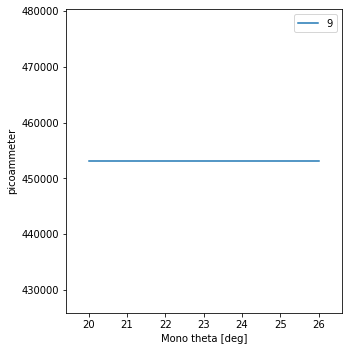

In [29]:
from bluesky.plans import scan
test = RE(scan(dets, motors, 20, 26, 3))

In [35]:
db[-1].table()
# exp_id = test[0]

,time,picoammeter,Mono theta [deg],Mono theta [deg]_user_setpoint
seq_num,,,,
1,2022-12-13 19:31:27.153378487,453100.0,20.0,20.0
2,2022-12-13 19:31:30.424196243,453100.0,23.0,23.0
3,2022-12-13 19:31:33.719572544,453100.0,26.0,26.0


Same but make it fancy

In [17]:
# some issues here -- not critical
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

# Make plots update live while scans run.
from bluesky.utils import install_kicker
install_kicker()

NotImplementedError: The matplotlib backend module://matplotlib_inline.backend_inline is not yet supported.



Transient Scan ID: 6     Time: 2022-10-29 20:46:39
Persistent Unique Scan ID: 'cab11e95-8e34-4fbe-8bd2-63d17391cb79'
New stream: 'primary'
+-----------+------------+------------+-------------+
|   seq_num |       time | Mono theta | picoammeter |
+-----------+------------+------------+-------------+
|         1 | 20:46:39.7 |    21.0000 |         116 |
|         2 | 20:46:41.1 |    22.0000 |         115 |
|         3 | 20:46:42.4 |    23.0000 |         115 |
|         4 | 20:46:43.8 |    24.0000 |         115 |
|         5 | 20:46:45.2 |    25.0000 |         114 |
|         6 | 20:46:46.5 |    26.0000 |         112 |
|         7 | 20:46:47.9 |    27.0000 |         192 |
|         8 | 20:46:49.3 |    28.0000 |         200 |
|         9 | 20:46:50.7 |    29.0000 |         195 |
|        10 | 20:46:52.1 |    30.0000 |         112 |
|        11 | 20:46:53.5 |    31.0000 |          90 |
+-----------+------------+------------+-------------+
generator scan ['cab11e95'] (scan num: 6)





('cab11e95-8e34-4fbe-8bd2-63d17391cb79',)

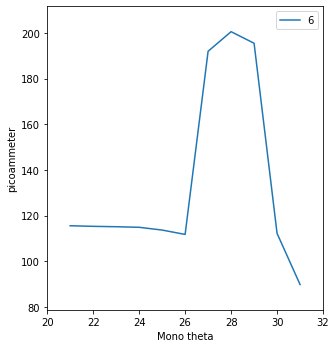

In [27]:
from bluesky.plans import scan
RE(scan(dets, motors, 21, 31, 11))

In [24]:
header = db[-1]
header.table()

,time,Mono theta,Mono theta_user_setpoint,picoammeter
seq_num,,,,
1,2022-10-30 03:44:05.538543701,20.0,20.0,116.21
2,2022-10-30 03:44:06.952156305,21.0,21.0,116.03




Transient Scan ID: 12     Time: 2022-10-29 20:52:38
Persistent Unique Scan ID: '420fe84a-d75e-44df-bf00-c5a1eb5d7733'
New stream: 'primary'
+-----------+------------+------------+-------------+
|   seq_num |       time | Mono theta | picoammeter |
+-----------+------------+------------+-------------+
|         1 | 20:52:38.4 |    25.0000 |         107 |
|         2 | 20:52:38.8 |    25.0500 |         107 |
|         3 | 20:52:39.2 |    25.1000 |         107 |
|         4 | 20:52:39.6 |    25.1500 |         106 |
|         5 | 20:52:40.0 |    25.2000 |         106 |
|         6 | 20:52:40.4 |    25.2500 |         106 |
|         7 | 20:52:40.8 |    25.3000 |         105 |
|         8 | 20:52:41.2 |    25.3500 |         105 |
|         9 | 20:52:41.6 |    25.4000 |         105 |
|        10 | 20:52:42.0 |    25.4500 |         103 |
|        11 | 20:52:42.3 |    25.5000 |         103 |
|        12 | 20:52:42.7 |    25.5500 |         103 |
|        13 | 20:52:43.1 |    25.6000 |         

('420fe84a-d75e-44df-bf00-c5a1eb5d7733',)

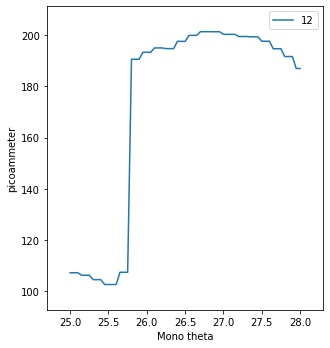

In [35]:
RE(scan(dets, motors, 25, 28, 61))



Transient Scan ID: 14     Time: 2022-10-29 20:55:22
Persistent Unique Scan ID: '9df04103-0f16-426e-a28a-5c0f0c4fa997'
New stream: 'primary'
+-----------+------------+------------+-------------+
|   seq_num |       time | Mono theta | picoammeter |
+-----------+------------+------------+-------------+
|         1 | 20:55:23.8 |    25.5000 |         107 |
|         2 | 20:55:23.8 |    25.5000 |         107 |
|         3 | 20:55:23.8 |    25.5000 |         107 |
|         4 | 20:55:23.9 |    25.5000 |         107 |
|         5 | 20:55:23.9 |    25.5000 |         107 |
|         6 | 20:55:24.1 |    25.5100 |         107 |
|         7 | 20:55:24.1 |    25.5100 |         107 |
|         8 | 20:55:24.1 |    25.5100 |         107 |
|         9 | 20:55:24.2 |    25.5100 |         107 |
|        10 | 20:55:24.2 |    25.5100 |         107 |
|        11 | 20:55:24.2 |    25.5100 |         107 |
|        12 | 20:55:24.2 |    25.5100 |         107 |
|        13 | 20:55:24.2 |    25.5100 |         

('9df04103-0f16-426e-a28a-5c0f0c4fa997',)

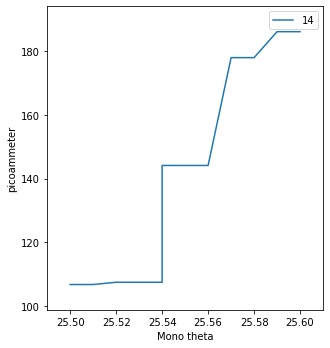

In [39]:
RE(scan(dets, motors, 25.5, 25.6, 101))



Transient Scan ID: 15     Time: 2022-10-29 20:59:47
Persistent Unique Scan ID: '70c3295b-1718-47c8-9ceb-fa4e3e48babc'
New stream: 'primary'
+-----------+------------+------------+-------------+
|   seq_num |       time | Mono theta | picoammeter |
+-----------+------------+------------+-------------+
|         1 | 20:59:47.6 |    17.0000 |         114 |
|         2 | 20:59:49.0 |    18.0000 |         114 |
|         3 | 20:59:50.4 |    19.0000 |         114 |
|         4 | 20:59:51.7 |    20.0000 |         114 |
|         5 | 20:59:53.1 |    21.0000 |         114 |
|         6 | 20:59:54.5 |    22.0000 |         114 |
|         7 | 20:59:55.9 |    23.0000 |         114 |
|         8 | 20:59:57.3 |    24.0000 |         114 |
|         9 | 20:59:58.7 |    25.0000 |         112 |
|        10 | 21:00:00.1 |    26.0000 |         109 |
|        11 | 21:00:01.5 |    27.0000 |         194 |
|        12 | 21:00:02.9 |    28.0000 |         200 |
|        13 | 21:00:04.3 |    29.0000 |         

('70c3295b-1718-47c8-9ceb-fa4e3e48babc',)

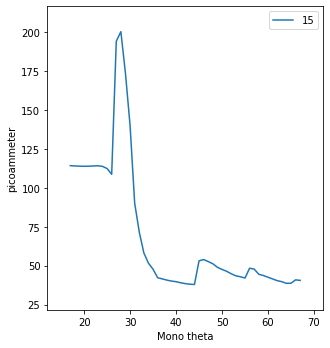

In [41]:
RE(scan(dets, motors, 17, 67, 51))

Testing EPICS standalone

In [4]:
import epics

current_uA = epics.caget('bl201-beamstop:current')
print("measured diode current: %1.6f uA" % (current_uA))


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.


cannot connect to bl201-beamstop:current


TypeError: must be real number, not NoneType

In [49]:
monoTheta_deg = epics.caget('IOC:m1')
print("Monochromator angle: %1.6f deg" % (monoTheta_deg))

Monochromator angle: 31.000000 deg


In [42]:
epics.caput('IOC:m1', 26)

1

In [ ]:
epics.caput('IOC:m1', 26)

In [44]:
epics.caget('newport:m21')

CA.Client.Exception...............................................
    Context: "Channel: "newport:m21", Connecting to: 131.243.80.239:42285, Ignored: 192.168.10.123:42285"
    Source File: ../cac.cpp line 1320


1.6e-05

    Current Time: Thu Nov 03 2022 17:26:17.896080361
..................................................................


In [47]:
epics.caput('newport:m21', 0.0)

1